# Project Overview:

**Problem domain:**

An analysis on Jupiter on Bitcoin Historical Data.

**Project origin and dataset**:

The raw data was downloaded directly from djrmarques at Kaggle.

# Problem Statement:

In this project, I have a data set on bitcoin price history. This data set has only hostrical data. I will use this data to check if I can predict future price change.

# Strategy:

First, I will preprocess the data, build a model, optimize it, then use it to predict the future price changes. In addition, I will use the hostrical data to answer several questions including:

- Can we predict the change % of Bitcoin price tomorrow using the collected data set ?

- Is Bitcoin price likely to increase or decrease in the coming years?
 
- Which date had the most trading volume?
 
- How is the trading volume during the Weekends versus Weekday?
 
- Which months during Bitcoin history has the highest increase % and which one has the lowest decrease %?

# Metrics:
Metrics to be measured include:

- R square and Standard Deviation
- Visualizations on the price movements
- Visualizations on the Weekdays vs Weekends
- Visualizations on the Volumes per Month

# Import the data:

In [233]:
#Import the libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [234]:
#import and parsing dates:
#Source: https://www.kaggle.com/djrmarques/bitcoin-daily-data/download
df = pd.read_csv('bitcoin_hist_data.csv', decimal=',', parse_dates=['Date'])
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2019-10-05,"7,371.0","7,443.6","7,451.8","7,332.5",3.41K,-0.97%
1,2019-10-04,"7,443.4","7,520.4","7,528.0","7,331.9",5.47K,-1.02%
2,2019-10-03,"7,520.4","7,657.2","7,689.6","7,381.7",7.03K,-1.78%
3,2019-10-02,"7,656.9","7,631.3","7,665.7","7,491.3",7.60K,0.34%
4,2019-10-01,"7,631.2","7,627.6","7,825.9","7,540.9",10.76K,0.02%


# Assess and clean the data:

In [235]:
#checking datatypes:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2961 entries, 0 to 2960
Data columns (total 7 columns):
Date        2961 non-null datetime64[ns]
Price       2961 non-null object
Open        2961 non-null object
High        2961 non-null object
Low         2961 non-null object
Vol.        2961 non-null object
Change %    2961 non-null object
dtypes: datetime64[ns](1), object(6)
memory usage: 162.0+ KB


In [236]:
#Convert Change % column to float:
df['Change %'].replace(to_replace=['%'], value='', regex=True, inplace=True)
df['Change %'] = df['Change %'].str.replace('−', '-').astype(float)

In [237]:
#rename Volume column:
df = df.rename({'Vol.':'Vol'}, axis=1)

In [238]:
#Remove commans to change dtypes:
df.replace(to_replace=[','], value='', regex=True, inplace=True)
#Replace units to be able to convrt Vol. from string to float:
df['Vol'] = df['Vol'].str.translate(str.maketrans({'K':'0','M':'000000','.':'','-':np.nan}))

In [239]:
df.head()

,Date,Price,Open,High,Low,Vol,Change %
0,2019-10-05,7371.0,7443.6,7451.8,7332.5,3410,-0.97
1,2019-10-04,7443.4,7520.4,7528.0,7331.9,5470,-1.02
2,2019-10-03,7520.4,7657.2,7689.6,7381.7,7030,-1.78
3,2019-10-02,7656.9,7631.3,7665.7,7491.3,7600,0.34
4,2019-10-01,7631.2,7627.6,7825.9,7540.9,10760,0.02


In [240]:
#changing columns types to float type for our analysis:
df[['Price', 'Open', 'High', 'Low', 'Vol']] = df[['Price', 'Open', 'High', 'Low', 'Vol']].astype(float)

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2961 entries, 0 to 2960
Data columns (total 7 columns):
Date        2961 non-null datetime64[ns]
Price       2961 non-null float64
Open        2961 non-null float64
High        2961 non-null float64
Low         2961 non-null float64
Vol         2943 non-null float64
Change %    2961 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 162.0 KB


In [242]:
#Checking the shape of the dataframe:
df.shape

(2961, 7)

In [243]:
#Drop NaNs rows:
df = df.dropna(how='any', axis=0)  

In [244]:
#Checking the shape of the dataset:
df.shape

(2943, 7)

In [245]:
#df['Up_Down'] = np.where(df['Change %']>0, 'Up', 'Down')

In [246]:
df.head()

,Date,Price,Open,High,Low,Vol,Change %
0,2019-10-05,7371.0,7443.6,7451.8,7332.5,3410.0,-0.97
1,2019-10-04,7443.4,7520.4,7528.0,7331.9,5470.0,-1.02
2,2019-10-03,7520.4,7657.2,7689.6,7381.7,7030.0,-1.78
3,2019-10-02,7656.9,7631.3,7665.7,7491.3,7600.0,0.34
4,2019-10-01,7631.2,7627.6,7825.9,7540.9,10760.0,0.02


# Building a Model:

In [247]:
X = df.iloc[:, 1:6].values
y = df.iloc[:, 6].values

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [249]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [250]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [251]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1.head(25)

,Actual,Predicted
0,-1.11,0.426447
1,0.00,0.499207
2,0.68,0.560684
3,1.97,2.020475
4,0.81,0.166182
5,0.08,0.387424
6,-7.77,-1.823016
7,3.94,0.346873
8,-1.88,0.485369
9,2.87,0.374200


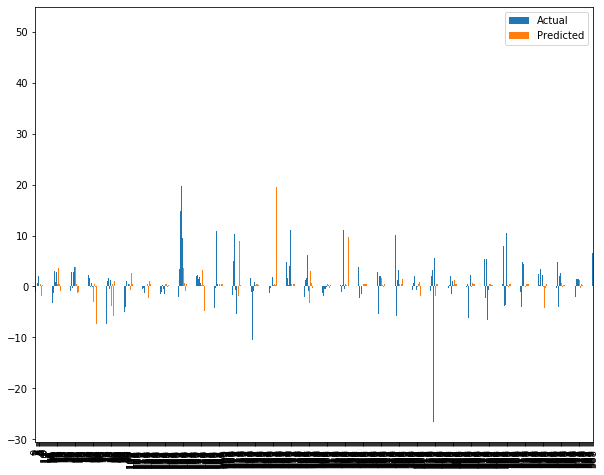

In [252]:
df1.plot(kind='bar',figsize=(10,8))
plt.show()

**Using this model, the output shows that there is a variance between actual vs predicted values.
We'll use the following function to get cross validation scores for our model:**

In [253]:
# function to get cross validation scores
def get_cv_scores(model):
    '''
    INPUT:
    model - the algorthim used
    
    OUTPUT:
    CV Mean: - The average score of the crossvalidation
    STD - The Standard Deviation of the crossvalidation
    Other Details - 
     '''
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [254]:
# get cross val scores
get_cv_scores(regressor)

CV Mean:  0.19981974319130982
STD:  0.04074629399794976




**R square value of 0.199 and SD of 0.0407. The low r square value shows that our model is not accurate. The SD value indicates we may be overfitting the training data.**

In [255]:
#Let’s see if we can improve performance using Scikit-Learn’s Ridge class::
regressor = Ridge(alpha=1)  
regressor.fit(X_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [256]:
# get cross val scores
get_cv_scores(regressor)

CV Mean:  0.1902934008094425
STD:  0.039779411756364604




**A average r square score of 0.1902 means we are only able to explain 19% of the variance with our Ridge Regression model, which is not an improvement from linear regression above. However, the SD decreased which suggests we are less likely to be overfitting.**

# Optimizing the Model:

**Let’s see if we can improve the r square score by changing our alpha value. We’ll use grid search to find an optimal alpha value:**

In [257]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=regressor, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
Best Score:  0.20902367776213257
Best Params:  {'alpha': 0.1}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.0s finished


# Discussion & Analysis:

**We explored two different linear models for regression:**

- Linear Regression

- Ridge

**We simplified our model with regularization. Unfortunately our R² score remains low. This is probably due to lack of sufficient data. However, in this case I will proceseed with analyzing the data using visualizations:**

**Is Bitcoin price likely to increase or decrease in the coming years?**

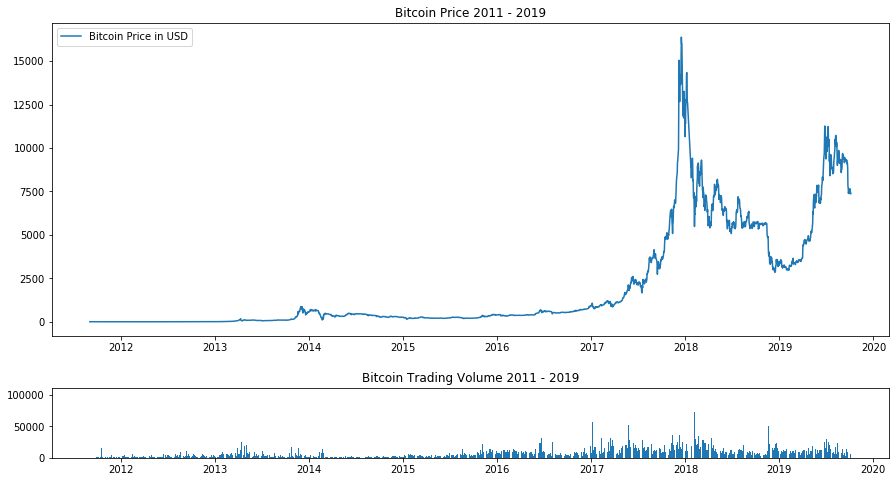

In [258]:
#Draw the Bitcoin Price and Volume history line chart:
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
top.plot(df['Date'], df['Price'],
         label ='Bitcoin Price in USD')
plt.title('Bitcoin Price 2011 - 2019')
plt.legend(loc=2)
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(df['Date'], df['Vol'])
plt.title('Bitcoin Trading Volume 2011 - 2019')
plt.subplots_adjust(hspace=0.75)
plt.gcf().set_size_inches(15,8)

According to the chart, the price peaked in 16 Dec 2017, then dropped to its lowest point at 16 Dec 2018, then it started raising again. It is interesting to see that it took exactly 1 year to move from the downtrend to the uptrend.

**Which date had the most trading volume?**

In [259]:
#Which date had the most trading volume?
df[df['Vol'] == df.Vol.max()]

,Date,Price,Open,High,Low,Vol,Change %
606,2018-02-06,6211.1,5483.5,6426.5,4741.2,105240.0,13.28


The highest volume in Bitcoin history was in 6 Feb 2018, when it reached its lowest price in early 2018.

**How is the trading volume during the Weekends versus Weekday?**

In [260]:
#Now we need to replace the numeric values with strings i norder to categorize them:
df['Day'] = df['Date'].dt.dayofweek
day = {0: "Weekday", 1: "Weekday", 2: "Weekday", 3: "Weekday", 4: "Weekday", 5: "Weekend", 6: "Weekend"}
df = df.replace({"Day": day})

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


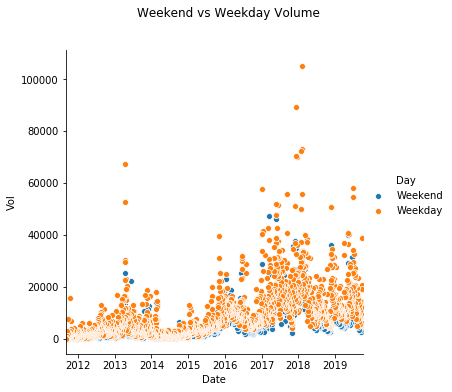

In [261]:
#Draw the the Volume history scatterplot chart by weekday/weekend:
ax = sns.pairplot(x_vars=["Date"], y_vars=["Vol"], data=df, hue="Day", size=5);
ax.set(xlim = (df.Date.min(), df.Date.max()));
ax.fig.suptitle("Weekend vs Weekday Volume", y=1.08);

Bitcoin seem to be volatile in both weekdays and weekends. However, most its high volume trading are in the weekdays.

**Which months during Bitcoin history has the highest increase % and which one has the lowest decrease %?**

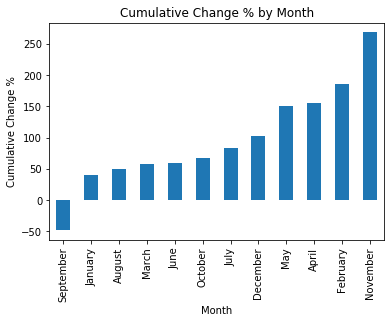

In [262]:
#Which months during Bitcoin history has the highest increase % and which one has the lowest decrease %? 
df1 = df.groupby(df['Date'].dt.strftime('%B'))['Change %'].sum().sort_values()
df1 = df1.plot(x='Date', y='Change %', kind='bar', title='Cumulative Change % by Month');
df1.set_ylabel("Cumulative Change %");
df1.set_xlabel("Month");

# Findings and Conclusion:

The data is not sufficent to provide an accurate prediction of the change %. However, the analysis show that in the end, Bitcoin price seems to be increasing steadly from 2011 to 2017, making its all-time high in 16 December 2017. After that, it started its downtrend until it reached its lowest price in 16 Dec 2018, then made its next increase wave.

Bitcoin seem to be volatile in both weekdays and weekends. However, most its high volume trading are in the weekdays.

The highest volume in Bitcoin history was in 6 Feb 2018, when it reached its lowest price in early 2018.

Furthermore, it seems the month that has the most downside is September, while the month that gets its most gains is November.